In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = ImageDataGenerator(rescale=1/255)
train_dir = '/content/drive/MyDrive/data/train/VNfruit'

val = ImageDataGenerator(rescale=1/255)
val_dir = '/content/drive/MyDrive/data/val/VNfruit'

In [4]:
train_generator = ImageDataGenerator(rotation_range = 10,
                                     zoom_range = 0.1,
                                     height_shift_range = 0.1,
                                     width_shift_range = 0.1,
                                     brightness_range = (0.9,1.1))

In [5]:
train_data = train_generator.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 128,
                                                    class_mode = 'categorical')

Found 1063 images belonging to 10 classes.


In [6]:
val_data = val.flow_from_directory(val_dir,
                                        target_size = (150,150),
                                         batch_size = 128,
                                         class_mode = 'categorical')

Found 1062 images belonging to 10 classes.


In [7]:
train_data.class_indices

{'apple': 0,
 'avocado': 1,
 'banana': 2,
 'coconut': 3,
 'dragonfruit': 4,
 'mango': 5,
 'orange': 6,
 'papaya': 7,
 'pineapple': 8,
 'strawberry': 9}

In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
history = model.fit(train_data,batch_size=128,epochs=100,verbose=1,validation_data=val_data)

Epoch 1/100
9/9 [==============================] - 424s 47s/step - loss: 2.8084 - accuracy: 0.1411 - val_loss: 2.3023 - val_accuracy: 0.1403
Epoch 2/100
9/9 [==============================] - 12s 1s/step - loss: 2.2771 - accuracy: 0.1383 - val_loss: 2.3021 - val_accuracy: 0.1318
Epoch 3/100
9/9 [==============================] - 11s 1s/step - loss: 2.2590 - accuracy: 0.1515 - val_loss: 2.3018 - val_accuracy: 0.1318
Epoch 4/100
9/9 [==============================] - 11s 1s/step - loss: 2.2315 - accuracy: 0.1731 - val_loss: 2.3012 - val_accuracy: 0.1563
Epoch 5/100
9/9 [==============================] - 11s 1s/step - loss: 2.1818 - accuracy: 0.2126 - val_loss: 2.3011 - val_accuracy: 0.1111
Epoch 6/100
9/9 [==============================] - 11s 1s/step - loss: 2.1040 - accuracy: 0.2446 - val_loss: 2.3004 - val_accuracy: 0.1064
Epoch 7/100
9/9 [==============================] - 11s 1s/step - loss: 1.9782 - accuracy: 0.2935 - val_loss: 2.2994 - val_accuracy: 0.1064
Epoch 8/100
9/9 [========

In [12]:
model.save('/content/drive/MyDrive/data/modelsave/final_VNfruit.h5')

In [14]:
model = load_model('/content/drive/MyDrive/data/modelsave/final_VNfruit.h5')
score=model.evaluate(val_data,verbose=1)
print('loss: ',score[0])
print('accuracy: ',score[1])

9/9 [==============================] - 3s 296ms/step - loss: 2.2641 - accuracy: 0.2203
loss:  2.264117479324341
accuracy:  0.22033898532390594


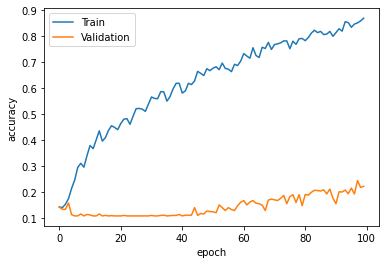

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

kết quả dự đoán:  coconut


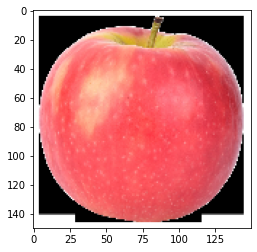

In [24]:
img = load_img('/content/apple2.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['apple','avocado','banana','coconut','dragonfruit','mango','orange','papaya','pineapple','strawberry']
print('kết quả dự đoán: ',Label[int(np.argmax(model.predict(img),axis=-1))])

kết quả dự đoán:  coconut


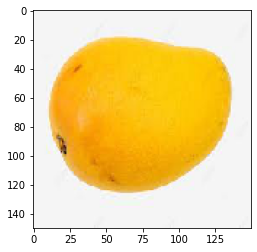

In [25]:
img = load_img('/content/images.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['apple','avocado','banana','coconut','dragonfruit','mango','orange','papaya','pineapple','strawberry']
print('kết quả dự đoán: ',Label[int(np.argmax(model.predict(img),axis=-1))])

{'apple': 0,
 'avocado': 1,
 'banana': 2,
 'coconut': 3,
 'dragonfruit': 4,
 'mango': 5,
 'orange': 6,
 'papaya': 7,
 'pineapple': 8,
 'strawberry': 9}